In [1]:
import numpy as np 
import pandas as pd 
 
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


In [7]:
price_data =  pd.read_csv('prices.csv', header=0)
price_data

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [8]:
price_data.dropna(axis=0, inplace=True)
price_data

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [9]:
nflx = price_data[price_data['symbol']=='NFLX']
nflx_stock_prices = nflx.close.values.astype('float32')
nflx_stock_prices = nflx_stock_prices.reshape(1762, 1)
nflx_stock_prices.shape

(1762, 1)

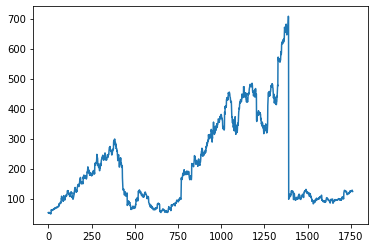

In [10]:
plt.plot(nflx_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
nflx_stock_prices = scaler.fit_transform(nflx_stock_prices)

In [11]:
train_size = int(len(nflx_stock_prices) * 0.80)
test_size = len(nflx_stock_prices) - train_size
train, test = nflx_stock_prices[0:train_size,:], nflx_stock_prices[train_size:len(nflx_stock_prices),:]
print(len(train), len(test))

1409 353


In [13]:
def create(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
look_back = 1
trainX, trainY = create(train, look_back)
testX, testY = create(test, look_back)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys


compilation time :  0.010806798934936523


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [17]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 1s 913us/step - loss: 0.0812 - val_loss: 0.3690
Epoch 2/10
1336/1336 [==============================] - 0s 70us/step - loss: 0.0393 - val_loss: 0.2097
Epoch 3/10
1336/1336 [==============================] - 0s 67us/step - loss: 0.0234 - val_loss: 0.1227
Epoch 4/10
1336/1336 [==============================] - 0s 65us/step - loss: 0.0184 - val_loss: 0.1009
Epoch 5/10
1336/1336 [==============================] - 0s 77us/step - loss: 0.0125 - val_loss: 0.0525
Epoch 6/10
1336/1336 [==============================] - 0s 69us/step - loss: 0.0067 - val_loss: 0.0231
Epoch 7/10
1336/1336 [==============================] - 0s 65us/step - loss: 0.0028 - val_loss: 0.0127
Epoch 8/10
1336/1336 [==============================] - 0s 65us/step - loss: 0.0014 - val_loss: 0.0199
Epoch 9/10
1336/1336 [==============================] - 0s 70us/step - loss: 0.0013 - val_loss: 0.0167
Epoch 10/10
1336/1336 [===

[[0.10866722]]
[[0.24640721]]
[[0.530777]]
[[1.2045397]]
[[3.0137284]]
[[ 120.68519]
 [ 211.38423]
 [ 398.63602]
 [ 842.2952 ]
 [2033.6097 ]]


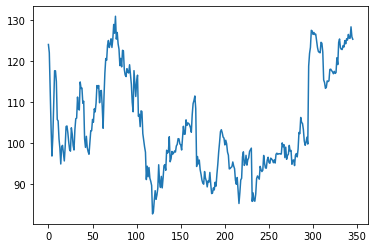

In [18]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)